In [1]:
#!/usr/bin/env python
"""
Demo for deblurring test problem
--------------------------------------------------------------------------
Created in 2023 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha, Silvia Gazzola, Connor Sanderford, and Ugochukwu Obinna Ugwu"
__affiliations__ = 'Tufts University, University of Bath, Arizona State University, and Tufts University'
__copyright__ = "Copyright 2023, TRIPs-Py library"
__license__ = "GPL"
__version__ = "1.0"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com; sg968@bath.ac.uk; csanderf@asu.edu; connorsanderford@gmail.com; Ugochukwu.Ugwu@tufts.edu"


Given two matrices $A$ and $L$, this notebook
1. demonstrates the GSVD and truncated GSVD computations.
2. plots the generalized singular values of $A$ and $L$.
3. illustrates application of the GSVD to a small image deblurring problem defined by $\min_{x}\|Ax-b\|_2^2 + \lambda\|Lx\|^2_2$, where $A$ is the blurring operator, L is a square matrix representing the first or second order differential operators, $b$ is the blurred and noisy image to be reconstructed.
4. plots the solution of the generalized Tikhonov's problem determined by applying the GSVD. 

Here, we define the matrices $A\in\mathbb{R}^{64^2\times64^2}$ and $L\in\mathbb{R}^{64^2\times64^2}$, generate the true and blurry images, i.e., $x_{\rm true}\in\mathbb{R}^{64^2}$ and $b_{\rm true}\in\mathbb{R}^{64^2}$, and lastly, the blurred and noisy image, $b\in\mathbb{R}^{64^2}$, with 0.1% Gaussian noise is added to $b_{\rm true}$ to generate $b$.

In [2]:
from trips.solvers import *
from trips.utilities.testProblems import *
from trips.utilities.decompositions import gsvd
from trips.solvers.GSVD import *
N = 64
A = basic_blurring_operators(N=N,sigma=2.5,band=4,type='blur') 
L = differential_operators(ncol=N*N, order='sq1')
Deblur = Deblurring(CommitCrime = True)
x_true = Deblur.gen_true('shape',**{'nx':N,'ny':N})
b_true = A@x_true.reshape((N*N,1))
(b, delta) = Deblur.add_noise(b_true.reshape((N**2,1)), opt = 'Gaussian', noise_level = 0.001)
b = b.reshape((N**2,1))

data already in the path.


Now call the GSVD function ${\tt gsvd}$ to compute the GSVD of $A$ and $L$, and also, verify the accuracy of computed GSVD factors.

In [3]:
U,V,Z,C,S = gsvd(A,L)
print(np.allclose(A, U@C@Z.T, atol=1e-8), np.allclose(L, V@S@Z.T, atol=1e-8))

True True


Given $C$ and $S$, compute and plot the generalized singular values $\gamma_\ell$ for $\ell = 1,2,\dots,64^2$.

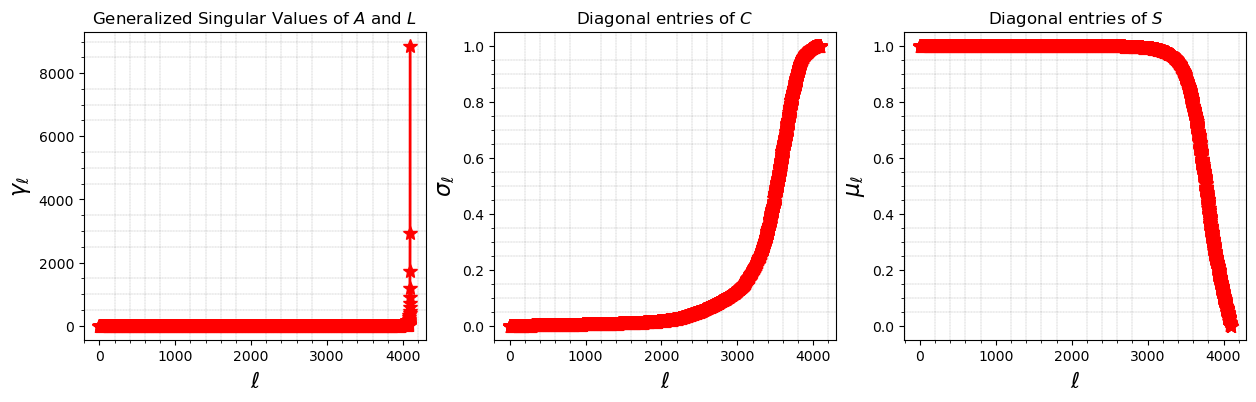

In [4]:
generalized_singular_values = np.diag(C)/np.diag(S)
simple_plot(generalized_singular_values,C,S)

We determine the regularization parameter by calling the function ${\tt gcvd}$. This function first computes the GSVD of $A$ and $L$, then uses the GSVD factors in the ${\tt gcv}$ function to determine the regularization paramter between the interval $(0,100]$ using the ${\tt fminbound}$ function.

In [5]:
mu = gcvd(A,L,b)

The solution of the Tikhonov's problem is determined by calling the ${\tt gsvd\_tik\_sol}$. This function takes inputs as $A$, $L$, $b$ and the regularization paramter. When a Tikhonov solution based on the truncated GSVD is desired, the ${\tt tgsvd\_tik\_sol}$ function which requires the truncation index is used.  

In [6]:
x_gsvd = gsvd_tik_sol(A,L,b,mu)
x_tgsvd = tgsvd_tik_sol(A,L,b,mu,3000)

Lastly, plot $x_{\rm true}$, $b_{\rm true}$, $b$, ${\rm x\_gsvd}$, and ${\rm x\_tgsvd}$. These may require reshaping.

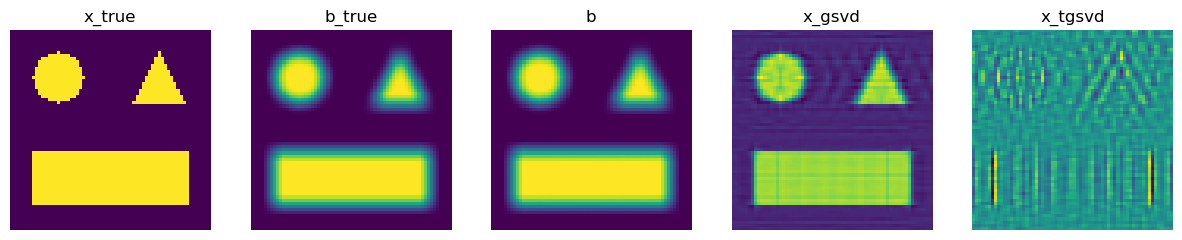

In [7]:
gsvd_plot(x_true,b_true,b,x_gsvd,x_tgsvd,N)